# Diabetes EDA

The dataset used for this project is from the National Institute of Diabetes and Digestive and Kidney Diseases posted on Kaggle. The data collected was intended to be used to predict whether or not a patient had diabetes based on diagnostic measurements. All patients are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

The following analysis was done in order to determine what variables may have an impact on the outcome of a diabetes diagnosis.

## Dataset Import

In [24]:
# Load libraries
import pandas as pd
import numpy as np

import thinkstats2
import thinkplot

import seaborn as sns
import matplotlib.pyplot as plt

import statistics
import statsmodels.formula.api as smf

In [13]:
# Read in diabetes dataset
diabetes = pd.read_csv('data/diabetes.csv')

In [14]:
# Show first 10 records
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
# Find total number of records
diabetes.shape

(768, 9)

Dataset has 768 records and 9 variables.

In [17]:
# Create smaller dataframe of diabetes data
diabetes_sb = diabetes[['Age', 'Glucose', 'Insulin', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Outcome']]

For analysis, I've chosen to work with the variables: age, glucose, insulin, BMI, number of pregnancies, diabetes pedigree function, and the diabetes outcome.

### Data Description

**Age** - Age (years) of patient

**Glucose** - plasma glucose concentration at 2 hours after oral glucose tolerance test

**Insulin** - 2-hour serum insulin (mu U/ml)

**BMI** - Body mass index (kgs/$meters^{2}$)

**Preg** - Number of times pregnant

**Pedigree** - Diabetes pedigree function provides data on diabetes mellitus history in relatives and genetic relationship of those relatives to the patient (hereditary risk)

**Outcome** - Diabetes outcome (Negative 0/Positive 1)

### Rename Columns

In [21]:
# Rename columns to make analysis easier
# Replace names in diabetes subset dataframe
diabetes_sb.rename(columns={'Age': 'age', 
                            'Glucose': 'glucose', 
                            'Insulin' : 'insulin', 
                            'BMI': 'bmi', 
                            'Pregnancies': 'preg', 
                            'DiabetesPedigreeFunction': 'pedigree', 
                            'Outcome' : 'outcome'}, 
                   inplace=True)

C:\Users\jcamp\AppData\Local\Temp\ipykernel_27212\3957955705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_sb.rename(columns={'Age': 'age',


### Validate Nulls

In [11]:
# Check for null in dataset
# No missing data
diabetes_sb.isnull().sum()

age         0
glucose     0
insulin     0
bmi         0
preg        0
pedigree    0
outcome     0
dtype: int64

## Histograms

In [25]:
# Function to provide mean, mode, spread of variable
def desc_statistics(var):
    # Print statistics
    # Mean
    print("Mean: {:.02f}".format(var.mean()))
    # Mode
    print("Mode: {}".format(statistics.mode(var)))
    # Spread / Standard Deviation
    print("Spread: {:.02f}".format(var.std()))

### Age

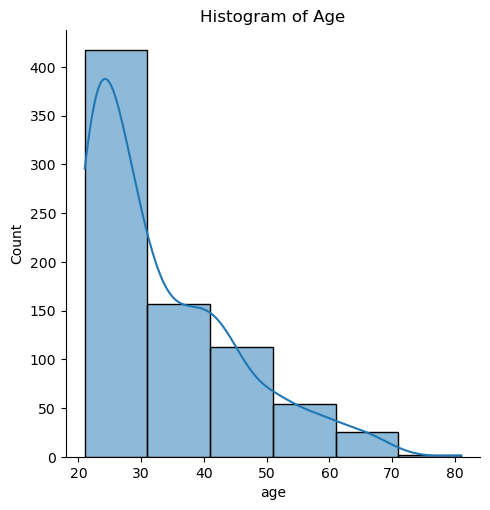

In [27]:
# Display age histogram
sns.displot(diabetes_sb.age, kde = True, bins = 6).set(title='Histogram of Age')
plt.show()

In [32]:
# Capture basic statistics of age distribution
desc_statistics(diabetes_sb.age)

Mean: 33.24
Mode: 22
Spread: 11.76


The patients that were captured in the dataset were females aged 21 and over. According to the descriptive statistics, it appears that the most common age captured was 22 years old with an average of 33 years old. The spread of age is approximately 12 years. In the histogram the dataset is shown to be significantly right-skewed.

### Glucose

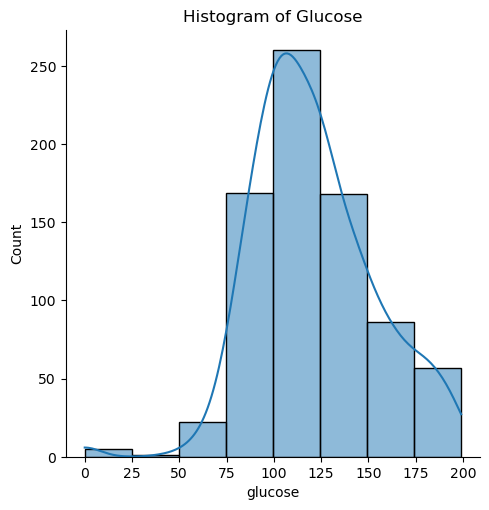

In [29]:
# Display glucose histogram
sns.displot(diabetes_sb.glucose, kde = True, bins = 8).set(title='Histogram of Glucose')
plt.show()

In [33]:
# Capture basic statistics of glucose distribution
desc_statistics(diabetes_sb.glucose)

Mean: 120.89
Mode: 100
Spread: 31.97


The glucose levels captured showed that the most common concentration was at 100 with an approximate average at 121. The spread of the distribution is 32. In the histogram shown above, the distbution appears to be approximately normal with a slightly larger concentration on the higher values of glucose.

### Insulin

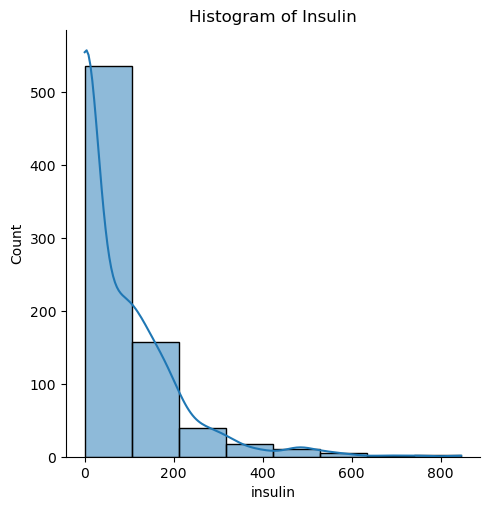

In [30]:
# Display insulin histogram
sns.displot(diabetes_sb.insulin, kde = True, bins = 8).set(title='Histogram of Insulin')
plt.show()

In [34]:
# Capture basic statistics of insulin distribution
desc_statistics(diabetes_sb.insulin)

Mean: 79.80
Mode: 0
Spread: 115.24


The captured insulin levels (mu U/ml) have an average of 80 with most values equaling 0. The spread of the distribution is approximately 115. The data appears to be significantly right-skewed as described in the statistics captured.

### BMI

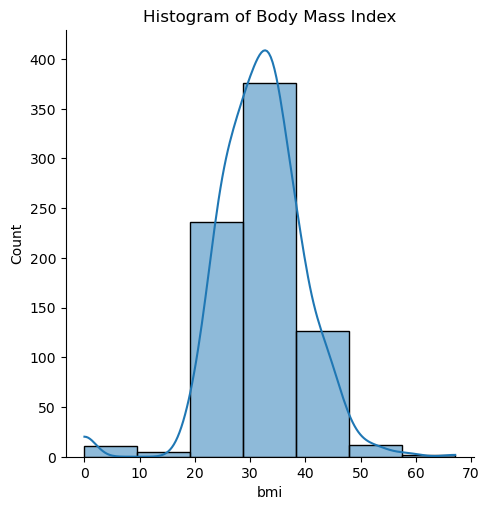

In [31]:
# Display BMI histogram
sns.displot(diabetes_sb.bmi, kde = True, bins = 7).set(title='Histogram of Body Mass Index')
plt.show()

In [35]:
# Capture basic statistics of BMI distribution
desc_statistics(diabetes_sb.bmi)

Mean: 31.99
Mode: 32.0
Spread: 7.88


The BMI (kgs/$meters^{2}$) distribution has a mean and mode of 32 with a spread of 7.88. The distribution of BMI appears to be approximately normal. As a reference point the BMI classifications are as follows:
* Underweight = < 18.5
* Normal = 18.5 - 24.9
* Overweight = 25 - 29.9
* Obesity = >= 30

With the classifications above in mind, values less than 18.5 should be considered outliers. Those who are drastically underweight will potentially skew the data. For the purpose of further analysis, the patients who were records with these BMIs should be removed from the dataset.

### Pregnancies

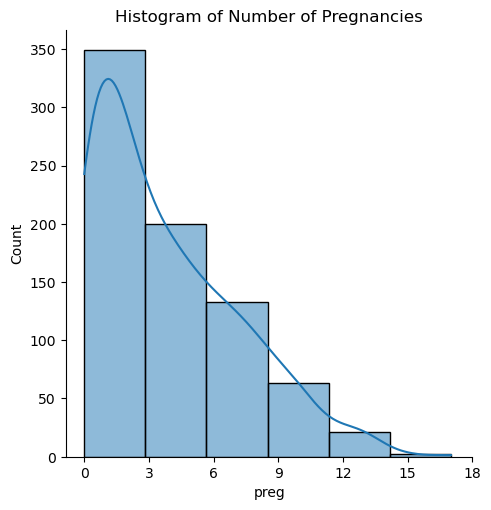

In [36]:
# Display pregnancy histogram
preg = sns.displot(diabetes_sb.preg, kde = True, bins = 6).set(title='Histogram of Number of Pregnancies')
# set x labels in increments of 3
preg.set(xticks=np.array([0,3,6,9,12,15,18]))
plt.show()

In [37]:
# Capture basic statistics of pregnancy distribution
desc_statistics(diabetes_sb.preg)

Mean: 3.85
Mode: 1
Spread: 3.37


The number of pregnancies has an approximate mean of 4 with a mode of 1. The spread is approximately 3. Utilziing the histogram above, the pregnancy distribution apppears to be significantly right-skewed. Additional consideration should be made for 12 or higher pregnancies if they are too far of an outlier to provide accurate results in future modeling and analysis.

### Diabetes Pedigree Function

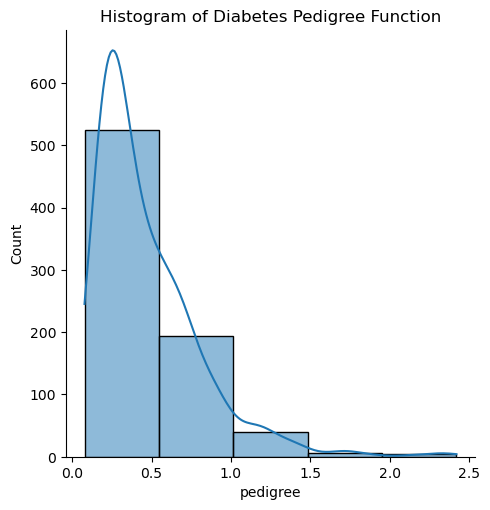

In [41]:
# Display diabetes pedigree histogram
sns.displot(diabetes_sb.pedigree, kde = True, bins = 5).set(title='Histogram of Diabetes Pedigree Function')
plt.show()

In [42]:
# Capture basic statistics of diabetes pedigree function distribution
desc_statistics(diabetes_sb.pedigree)

Mean: 0.47
Mode: 0.254
Spread: 0.33


The hereditary risk calculated through the diabetes pedigree function has a mean of 0.47 and a mode of 0.25. The spread of the distribution is 0.33. The distribution shown above apppears to be significantly right-skewed.

### Diabetes Outcome

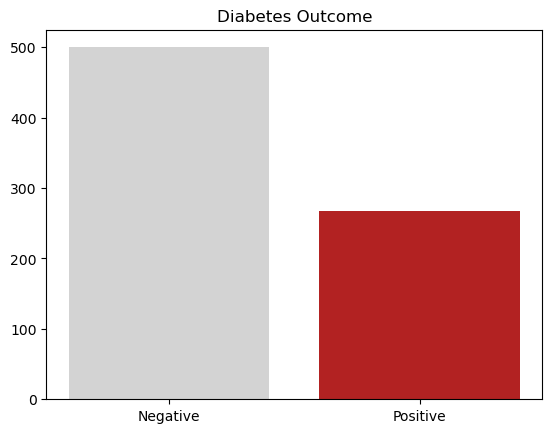

In [56]:
# bar chart of dataset diabetes outcome
categories = ["Negative", "Positive"]
counts = diabetes_sb.outcome.value_counts().values
plt.bar(categories, counts, color=['lightgray', 'firebrick'])
plt.title('Diabetes Outcome')
plt.show()

Based on the bar chart above, the outcome shows that there is almost twice the amount of negative diabetes results as there are positive results captured.

## PMF

In [57]:
# Split by diabetes outcome
# Positive shows an outcome of diabetes
positive = diabetes_sb[diabetes_sb.outcome == 1]
# Negative shows an outcome of no diabetes
negative = diabetes_sb[diabetes_sb.outcome == 0]

In [58]:
# Create PMF for each group to compare the effect of pregnancies and diabetes
positive_pmf = thinkstats2.Pmf(positive.preg, label="Diabetes")
negative_pmf = thinkstats2.Pmf(negative.preg, label="No Diabetes")

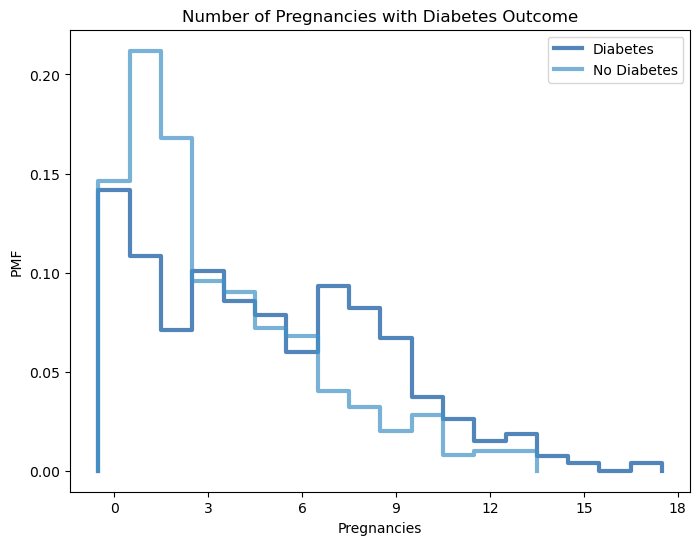

In [74]:
# Plot two lines
thinkplot.PrePlot(2)
# Add pmfs to plot
thinkplot.Pmfs([positive_pmf, negative_pmf])
# Show chart with labels
thinkplot.Show(xlabel="Pregnancies",ylabel="PMF",xticks=[0,3,6,9,12,15,18],title="Number of Pregnancies with Diabetes Outcome")

Utilizing the number of pregnancies with or without diabetes in a pmf, there appears to be some variability based on the diabetes outcome. This variability is shown between 1-2 and 7-9 pregnancies. Additional data would be needed to determine if the variability is just noise or if they is a relationship between the two variables.

## CDF

In [98]:
# Create cdf of patients glucose level that had a diabetes outcome
glucose_cdf = thinkstats2.Cdf(positive.glucose,label='Glucose')

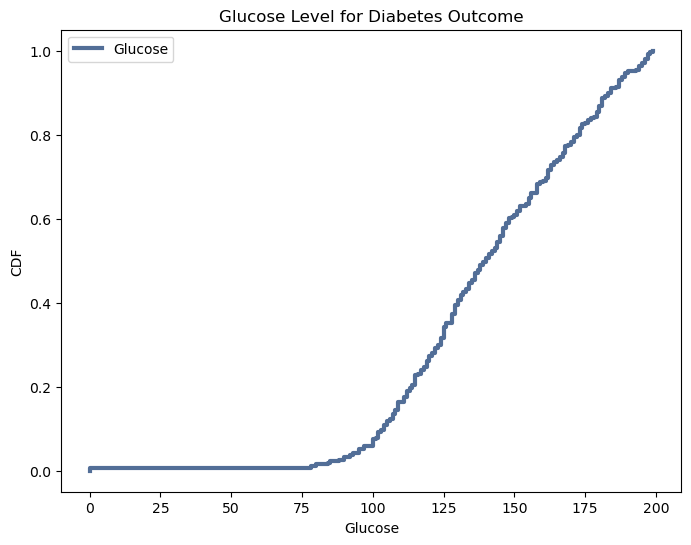

In [99]:
# Plot CDF
thinkplot.Cdf(glucose_cdf)
thinkplot.Show(xlabel='Glucose', ylabel='CDF',title='Glucose Level for Diabetes Outcome')

When analyzing glucose levels with a positive diabetes outcome, the CDF shows the probability the fraction of values less than or equal to the given value. The percentile rank appears to increase signficantly from the 100-200 glucose levels.

## Analytical Distribution

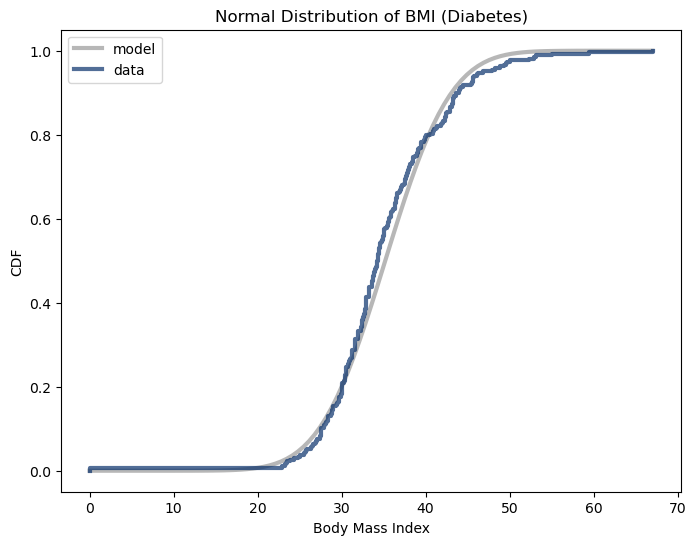

In [103]:
# Calculate mu and var from patients body mass index that have a positive diabetes outcome
mu, var = thinkstats2.TrimmedMeanVar(positive.bmi, p=0.01)

# calculate sigma
sigma = np.sqrt(var)
# create normal cdf
# based on bmi distribution render normal cdf
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=67)

# plot the model
thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(positive.bmi, label="data")

# Plot and show normal distribution CDF
thinkplot.Cdf(cdf)
thinkplot.Show(title="Normal Distribution of BMI (Diabetes)", xlabel="Body Mass Index", ylabel="CDF")

The body mass index of those who had diabetes data appears to have some deviation from the normal distribution model specifically between 20-30 and 35-50. 

# Correlation and Causation

In [105]:
def scatter_statistics(xs, ys):
    # Covariance
    print('Covariance:', thinkstats2.Cov(xs, ys))
    # Correlation
    print('Correlation:', thinkstats2.Corr(xs, ys))
    # Spreaman Correlation
    print('Spearman Correlation:', thinkstats2.SpearmanCorr(xs, ys))

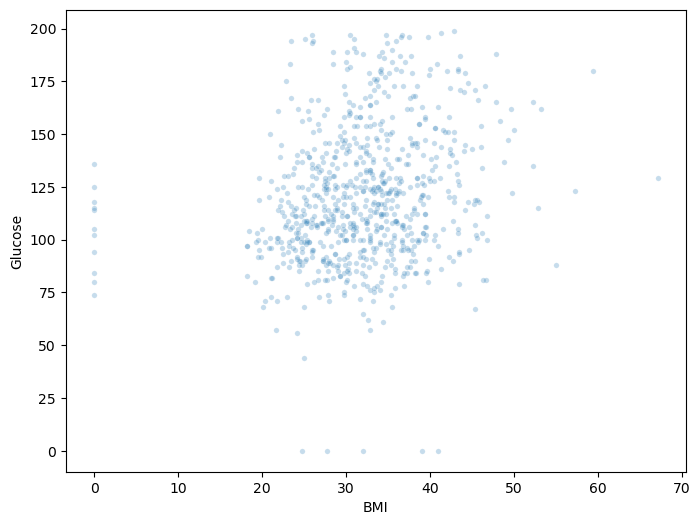

In [121]:
# Correlation between BMI and Glucose
sns.scatterplot(data=diabetes_sb, x="bmi", y="glucose", alpha=0.25, s=15)
thinkplot.Show(xlabel="BMI", ylabel="Glucose")

In [106]:
# Show BMI/Glucose Covariance and Correlation
scatter_statistics(diabetes_sb.bmi,diabetes_sb.glucose)

Covariance: 55.65442555745443
Correlation: 0.221071069458983
Spearman Correlation: 0.23114119425993723


BMI and Glucose levels have a positive covariance indicating that the variables move in the same direction; however, there is a negligible correlation between the variables. The slight difference between the Pearson's and Spearman's correlation suggesting a non-linear relationship or influence of outliers.

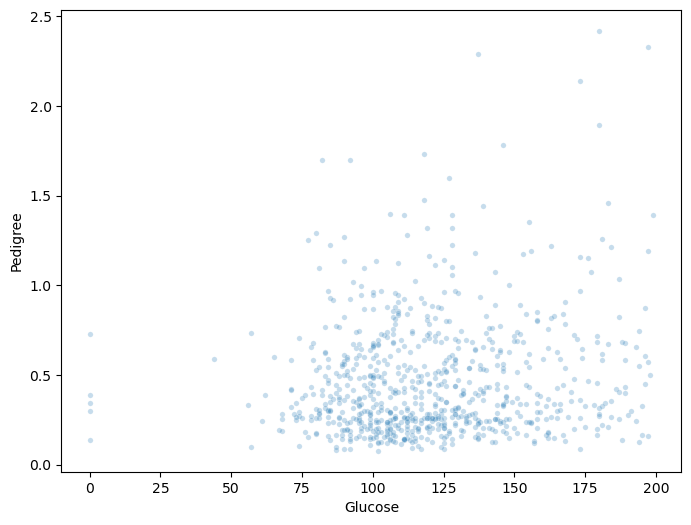

In [125]:
# Correlation between Glucose and Diabetes Pedigree (genetic risk)
sns.scatterplot(data=diabetes_sb, x="glucose", y="pedigree", alpha=0.25, s=15)
thinkplot.Show(xlabel="Glucose", ylabel="Pedigree")

In [126]:
scatter_statistics(diabetes_sb.glucose,diabetes_sb.pedigree)

Covariance: 1.452980443318685
Correlation: 0.1373372998283707
Spearman Correlation: 0.09129336487628698


Glucose levels and Genetic Risk (diabetees pedigree function) have a positive covariance indicating that the variables move in the same direction; however, there is a negligible correlation between the variables. There is a signficant difference between the Pearson's and Spearman's correlation suggesting a non-linear relationship or influence of outliers.

# Hypothesis Testing

In [303]:
# Textbook chi-squared class with modifications
class ChiSquaredOutcome(thinkstats2.HypothesisTest):

    # Create model
    def MakeModel(self):
        normal, plus = self.data
        self.n = len(normal)
        self.pool = np.hstack((normal, plus))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(2)
        self.expected_probs = np.array(pmf.Probs(self.values))

        # Run Model
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
  
    # Add chi-squared values to return stat
    def TestStatistic(self, data):
        normal, plus = data
        stat = self.ChiSquared(normal) + self.ChiSquared(plus)
        return stat

    # Conduct chi-squared test
    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat
    
def outcomeTest(diabetes, iters=1000):
    # Seperate bmi from normal to plus size
    # underweight and normal
    normal = diabetes[diabetes.bmi <= 25]
    # overweight and obese
    plus = diabetes[diabetes.bmi > 25]
    
    # Compare diabetes outcome
    data = normal.outcome.values, plus.outcome.values
    # Perform chi squared test
    ht = ChiSquaredOutcome(data)
    pvalue = ht.PValue(iters=iters)
    # Print results
    print("-" * 25)
    print("Sample Size of {}".format(len(diabetes)))
    print("p-value: {}".format(pvalue))

In [302]:
# Get length of dataset
n = len(diabetes_sb)
# Run 5 tests with 1000 iterations
for i in range(5):
    # Grab sample rows from dataset
    sample = thinkstats2.SampleRows(diabetes_sb, n)
    outcomeTest(sample)
    # divide n by 2 each test
    n //= 2

-------------------------
Sample Size of 768
p-value: 0.0
-------------------------
Sample Size of 384
p-value: 0.0
-------------------------
Sample Size of 192
p-value: 0.0
-------------------------
Sample Size of 96
p-value: 0.049
-------------------------
Sample Size of 48
p-value: 0.097


When determining if there is a statistically significant difference between normal and plus size BMIs for a diabetes outcome, the p-value appears to be no longer significant at a sample size of 48.

# Regression Analysis

In [340]:
# Predicting outcome (categorical) requires using a multinormial logistic regression
# glucose, pedigree, bmi, and age appear to have value in the model
formula = 'outcome ~ glucose + pedigree + bmi + age'
model = smf.mnlogit(formula, data = diabetes_sb)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.486480
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                outcome   No. Observations:                  768
Model:                        MNLogit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.2479
Time:                        15:17:46   Log-Likelihood:                -373.62
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.181e-52
==============================================================================
 outcome=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6545      0.682    -12.694      0.000      -9.991      -7.318
glucose        0.0322      0.003      9.575      0.000       0.026       0.039
pedigree       0.8300      0.289      2.869      0.004       0.263       1.397
bmi            0.0787      0.014      5.810      0.000       0.052       0.105
age            0.0302      0.008      3.942      0.000       0.015       0.045
==============================================================================
"""

The p-value of the variables appear to be significant and the std error is low utilizing multinormial logistic regression.